In [87]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import re
import xlsxwriter
from collections import Counter
import nltk

In [88]:
data= pd.read_excel("wp.xlsx",index_col=None, na_values=['NA'], parse_cols = "C:C")
data.head(1)

,Articles
0,LOS ANGELES Writer and director James Toback w...


In [89]:
articles= data[['Articles']].values

In [90]:
len(articles)

3508

In [91]:
def build_dict(articles):
    cnt= Counter()
    texts=''
    for i in range (len(articles)):
        text= articles[i][0]
        texts=texts+text
        words= nltk.word_tokenize(text)
        for word in words:
            cnt[word]+=1
    return cnt,texts

In [92]:
articleCounter,articleText=build_dict(articles)

In [93]:
articleCounter.most_common(50)

[('the', 135655),
 ('to', 79276),
 ('and', 76936),
 ('a', 75927),
 ('of', 72088),
 ('in', 50830),
 ('s', 38720),
 ('that', 34278),
 ('for', 30432),
 ('is', 28033),
 ('The', 23596),
 ('on', 23276),
 ('with', 20167),
 ('it', 20125),
 ('as', 17523),
 ('at', 15697),
 ('said', 14686),
 ('are', 13482),
 ('from', 13333),
 ('was', 12873),
 ('I', 12775),
 ('by', 12763),
 ('be', 12668),
 ('has', 12289),
 ('have', 11687),
 ('an', 11512),
 ('or', 10350),
 ('he', 10185),
 ('its', 10177),
 ('you', 10051),
 ('more', 9417),
 ('will', 9268),
 ('not', 9010),
 ('about', 8963),
 ('t', 8860),
 ('who', 8489),
 ('his', 8461),
 ('this', 8382),
 ('their', 8081),
 ('they', 8008),
 ('Amazon', 7488),
 ('but', 7203),
 ('up', 7010),
 ('which', 6913),
 ('can', 6873),
 ('one', 6650),
 ('company', 6576),
 ('m', 6524),
 ('It', 6242),
 ('year', 6052)]

In [94]:
# ignore unimportant words
ignore = ['the','a','if','in','it','of','or','to','and','s','for','is','as','at','are','was','by','t','that','m',]
for word in list(articleCounter):
    if word.lower() in ignore:
        del articleCounter[word]

In [95]:
articleCounter.most_common(100)

[('on', 23276),
 ('with', 20167),
 ('said', 14686),
 ('from', 13333),
 ('I', 12775),
 ('be', 12668),
 ('has', 12289),
 ('have', 11687),
 ('an', 11512),
 ('he', 10185),
 ('its', 10177),
 ('you', 10051),
 ('more', 9417),
 ('will', 9268),
 ('not', 9010),
 ('about', 8963),
 ('who', 8489),
 ('his', 8461),
 ('this', 8382),
 ('their', 8081),
 ('they', 8008),
 ('Amazon', 7488),
 ('but', 7203),
 ('up', 7010),
 ('which', 6913),
 ('can', 6873),
 ('one', 6650),
 ('company', 6576),
 ('year', 6052),
 ('than', 6031),
 ('new', 5827),
 ('we', 5560),
 ('would', 5513),
 ('her', 5422),
 ('out', 5376),
 ('all', 5153),
 ('also', 5117),
 ('But', 5096),
 ('had', 5046),
 ('been', 4853),
 ('other', 4605),
 ('she', 4592),
 ('percent', 4488),
 ('what', 4477),
 ('people', 4457),
 ('into', 4435),
 ('were', 4343),
 ('like', 4341),
 ('your', 4309),
 ('1', 4294),
 ('when', 4198),
 ('Washington', 4168),
 ('time', 4081),
 ('some', 4065),
 ('so', 3978),
 ('there', 3833),
 ('p', 3780),
 ('them', 3689),
 ('could', 3656),
 

## For more information about 
[WordCloud](https://github.com/amueller/word_cloud)

[Format](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

In [81]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [122]:
wordcloud = WordCloud(background_color="white", width=1200, height=1000).generate(articleText)

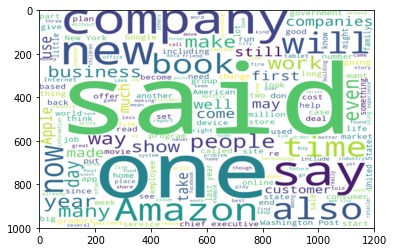

In [123]:
plt.imshow(wordcloud, interpolation='bilinear',aspect='auto')

In [124]:
fig = plt.figure(frameon=False)

In [125]:
w = 7195
h = 3841
fig.set_size_inches(w,h)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(wordcloud, aspect='auto')

In [126]:
fig.savefig('figure.png', dpi=1)